In [2]:
from IPython.core.display import display
from face_detection import extract_faces, open_image
from face_recognition import get_embedding, distance
from PIL import Image

Using TensorFlow backend.
W0117 01:44:55.807635  2180 deprecation_wrapper.py:119] From C:\Users\Gencho\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0117 01:45:09.365266  2180 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


In [3]:
bobi = r'./test/bobi1.jpg'
marian1 = r'./test/marian1.jpg'
marian2 = r'./test/marian2.jpg'

In [4]:
bobi_face = extract_faces(open_image(bobi))[0]
marian_face1 = extract_faces(open_image(marian1))[0]
marian_face2 = extract_faces(open_image(marian2))[0]

W0117 01:45:09.461431  2180 deprecation_wrapper.py:119] From C:\Users\Gencho\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



In [5]:
Image.fromarray(bobi_face).save(r'./out/bobiface.jpg')
Image.fromarray(marian_face1).save(r'./out/marianface1.jpg')
Image.fromarray(marian_face2).save(r'./out/marianface2.jpg')

In [8]:
emb = get_embedding(marian_face2)

print(emb)
print(emb.shape)

[ 0.16802764  1.2356724  -0.6511444   1.5756283   0.998952   -0.15796292
  0.12503801 -0.337575    1.900118   -1.9033234  -0.43064213  0.20960449
 -1.4000878  -0.79542494 -0.7800878   0.34704685 -0.16929705 -0.31746924
 -2.5325806   1.2286714   0.41957298  1.1992651   0.8248132  -1.1329919
 -0.5201194  -1.4446762   0.48832634  0.7312952  -0.69876117  0.5902101
 -0.61924124 -1.0608236   0.44642845 -1.199612   -0.59228355  0.6180509
 -0.89476407 -1.7745467  -0.2976194   0.24525245 -0.97348917 -0.9072375
 -2.1922977  -1.4094168   1.7762978  -0.82614416  0.21267866  0.5876161
 -1.8383197   1.4526743  -1.4432086  -0.30691832  0.6875387   0.97326565
  0.24225035  0.3360918   0.44648117  0.6507507  -0.3814907  -0.0354161
 -0.6562124  -1.5474715   2.2902503  -0.80069405  0.26550275  0.27774292
  0.5377944   1.760701   -1.7385703  -0.702798   -1.192417    1.0621482
 -0.64141434 -0.66957384 -1.4607826  -1.0289218   0.14672995  0.05640565
  0.8287647  -0.62499976 -0.97692096 -0.96818376  1.058351

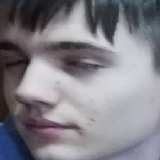

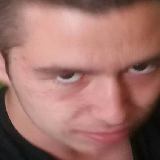

15.416445
different person


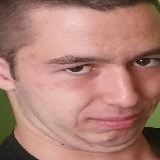

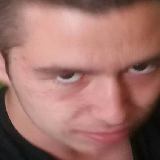

8.533536
same person


In [7]:
ref_faces = [bobi_face, marian_face1]
test_faces = [marian_face2]

for ref_face in ref_faces:
    for test_face in test_faces:
        emb1 = get_embedding(ref_face)
        emb2 = get_embedding(test_face)
        
        display(Image.fromarray(ref_face))
        display(Image.fromarray(test_face))
        
        dist = distance(emb1, emb2)
        print(dist)
        if dist < 15:
            print('same person')
        else:
            print('different person')